In [1]:
ls

Aggregation.txt              overlap.txt2frames.gif
Aggregation.txt12frames.gif  overlap.txt4frames.gif
Aggregation.txt20frames.gif  overlap.txt5frames.gif
Aggregation.txt22frames.gif  overlap.txt6frames.gif
Aggregation.txt3frames.gif   overlap.txt7frames.gif
animation-400.mp4            pogo.ipynb
animation-b.mp4              R15.txt
animation-c.mp4              R15.txt22frames.gif
animation-d.mp4              R15.txt40frames.gif
animation.gif                R15.txt50frames.gif
animation.mp4                R15.txt60frames.gif
aniso99frames.gif            R15.txt80frames.gif
Compound.txt                 R15.txt93frames.gif
Compound.txt22frames.gif     R15.txt98frames.gif
D31.txt                      README.md
D31.txt19frames.gif          scikitlearn-clustering-data.ipynb
D31.txt22frames.gif          spiral20frames.mp4
D31.txt96frames.gif          spiral40frames.mp4
D31.txt99frames.gif          spiral.txt
jain40frames.mp4             spiral.txt20frames.gif
jain.txt                     s

In [2]:
import numpy as np
import pandas as pd
import gudhi

In [3]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from matplotlib.collections import PatchCollection

In [4]:

from sklearn import datasets

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics

import os.path

In [5]:
from urllib.request import urlopen
from urllib.parse import urlparse

In [6]:
%matplotlib inline

#randomized blobs with standard deviation
n = 6
std = np.random.random_sample((n,))
#std = 1
X, y, z = make_blobs(
    n_samples=n*100,
    n_features=2,
    centers=n,
    cluster_std=std,
    center_box=(-10.0, 10.0),
    shuffle=False,
    random_state=42,
    return_centers=True,
)



size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

In [7]:
#data from scikitlearn tutorial on clustering 

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), np.ones(n_samples,dtype='int')

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

In [8]:
X=aniso[0]
y=aniso[1]
filename = 'aniso'


In [9]:

urls_with_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

urls_without_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/overlap.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/a1.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

ground_truth_urls = ['https://cs.joensuu.fi/sipu/datasets/overlap.pa'
    
]

urls_with_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_with_ground_truth
}


urls_without_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_without_ground_truth
}


ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in ground_truth_urls
}

In [10]:
urls_with_ground_truth

{'D31.txt': 'https://cs.joensuu.fi/sipu/datasets/D31.txt',
 'spiral.txt': 'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
 'pathbased.txt': 'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
 'R15.txt': 'https://cs.joensuu.fi/sipu/datasets/R15.txt'}

In [11]:
ground_truth

{'overlap.pa': 'https://cs.joensuu.fi/sipu/datasets/overlap.pa'}

In [12]:
def return_dataset(filename):
    if filename in urls_with_ground_truth:
        url= urls_with_ground_truth[filename]
        print(url)
        parse = urlparse(url)
        print(filename)
        raw_data = urlopen(url)
        data = np.loadtxt(raw_data)

        print(data.shape)
        print(data[:10])

        y = data[:,2]
        print(y.shape)
        X = data[:,:2]
        print(X.shape)
        return X, y, filename
    else:
        pass

In [13]:
X, y, filename = return_dataset('D31.txt')

https://cs.joensuu.fi/sipu/datasets/D31.txt
D31.txt
(3100, 3)
[[25.0514  5.7475  1.    ]
 [26.6614  7.3414  1.    ]
 [25.2653  6.2466  1.    ]
 [25.2285  4.7447  1.    ]
 [25.7529  5.1564  1.    ]
 [24.0785  5.6693  1.    ]
 [25.2722  6.8676  1.    ]
 [24.6535  6.2443  1.    ]
 [26.9834  6.633   1.    ]
 [25.7437  6.3179  1.    ]]
(3100,)
(3100, 2)


In [14]:
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

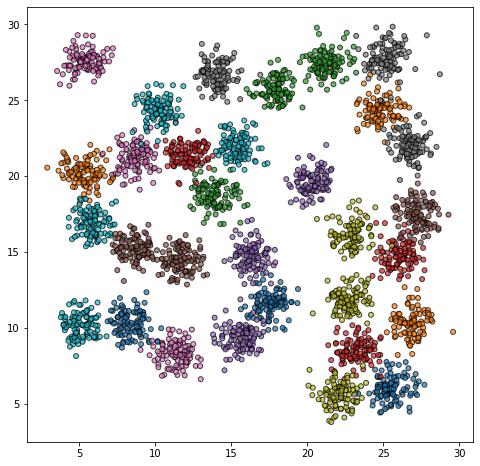

In [15]:
size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

In [16]:
rips_complex = gudhi.RipsComplex(points=X)

In [17]:
simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
   
print(simplex_tree.num_vertices() , 'vertices')  
print(simplex_tree.num_simplices(), 'simplices')
print('dimension:', simplex_tree.dimension())

3100 vertices
4806550 simplices
dimension: 1


usetex mode requires TeX.


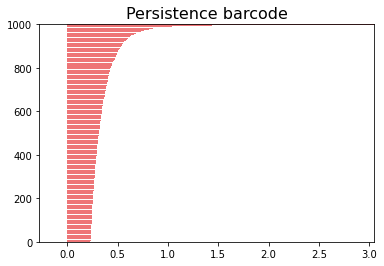

In [18]:
diag = simplex_tree.persistence()
gudhi.plot_persistence_barcode(diag)
plt.show()

In [19]:
#move through list and assign clusters to conected components
point_dict={i:0 for i in range(simplex_tree.num_vertices())}
counter=0
cluster_dict_list = []
distance_list = []
for simplex in simplex_tree.get_filtration():
    if len(simplex[0])>1:
        if all(value > 0 for value in list(point_dict.values())):
            if len(np.unique(np.array(list(point_dict.values())))) == 1:
                print('break')
                print(simplex)
                print(simplex[1])
                simplex_tree.prune_above_filtration(simplex[1])
                break


        #if both points are still in cluster 0, assign both to a new cluster
        if point_dict[simplex[0][0]] == 0 and point_dict[simplex[0][1]] == 0:
            counter += 1
            point_dict[simplex[0][0]] = counter
            point_dict[simplex[0][1]] = counter
            #if one point is in cluster 0 and one is not, assign the one in cluster 0 to the existing cluster
        elif point_dict[simplex[0][0]] == 0 and point_dict[simplex[0][1]] != 0:
            point_dict[simplex[0][0]] = point_dict[simplex[0][1]]

            #and vice versa
        elif point_dict[simplex[0][0]] != 0 and point_dict[simplex[0][1]] == 0:
            point_dict[simplex[0][1]] = point_dict[simplex[0][0]]

            #if both points are not in cluster 0 and not in the same cluster, merge clusters to the lower number cluster
        elif point_dict[simplex[0][0]] != 0 and point_dict[simplex[0][1]] != 0 and point_dict[simplex[0][0]] != point_dict[simplex[0][1]]:
            larger_cluster_number = max(point_dict[simplex[0][0]], point_dict[simplex[0][1]])
            smaller_cluster_number = min(point_dict[simplex[0][0]], point_dict[simplex[0][1]])
            for key, value in point_dict.items():
                if value == larger_cluster_number:
                    point_dict[key] = smaller_cluster_number
                    
        distance_list.append(simplex[1])
        cluster_dict_list.append(point_dict.copy())

break
([1771, 2599], 2.771534356633523)
2.771534356633523


In [20]:
max(distance_list)

2.7715238588184663

In [21]:
len(distance_list)

212271

In [22]:
distance_array = np.array(distance_list)
print(len(distance_array))
distance_array.dtype

212271


dtype('float64')

In [23]:
length = len(cluster_dict_list)
length

212271

In [24]:
print(simplex_tree.num_simplices(), 'simplices')
#?

215372 simplices


In [25]:
#check that all clusters have merged
len(np.unique(np.array(list(point_dict.values()))))

1

In [26]:
print(cluster_dict_list[-2].values()) #penultimate clustering has 2 clusters
print(cluster_dict_list[-1].values()) #last clustering finally merges to all one cluster

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [27]:
#find the gaps between birth/death pairs
gaps = np.diff(distance_array)
gaps.shape

(212270,)

In [28]:
#add a zero back to the beginning of the gaps
gaps = np.concatenate([np.zeros(1),gaps])

In [29]:
#find normalized distance
scaler = MinMaxScaler()
normed_distance = scaler.fit_transform(distance_array.reshape(-1,1)).T.reshape(length)

In [30]:
#then invert them and multiply by the gaps to weight early connections in the filtration
inverted_normed_distance = 1 - normed_distance
inverted_normed_distance

array([ 1.00000000e+00,  9.99655972e-01,  9.99655972e-01, ...,
        8.27107628e-06,  7.77156117e-16, -2.22044605e-16])

In [32]:
#and square it twice to increase the weighting
inverted_normed_distance = np.square(np.square(inverted_normed_distance))

In [33]:
inverted_normed_distance

array([1.00000000e+00, 9.98624597e-01, 9.98624597e-01, ...,
       4.68002427e-21, 3.64781731e-61, 2.43086534e-63])

In [34]:
normed_gaps = np.multiply(gaps, inverted_normed_distance)
normed_gaps

array([0.00000000e+00, 9.51380859e-04, 0.00000000e+00, ...,
       4.46641244e-27, 8.35512920e-66, 5.39760535e-78])

In [35]:
#normalize to create a probability vector
gap_vector = normed_gaps / np.sum(normed_gaps)

In [36]:
#check
np.sum(gap_vector)

1.0

In [37]:
gap_vector

array([0.00000000e+00, 1.71800166e-03, 0.00000000e+00, ...,
       8.06543866e-27, 1.50876756e-65, 9.74698496e-78])

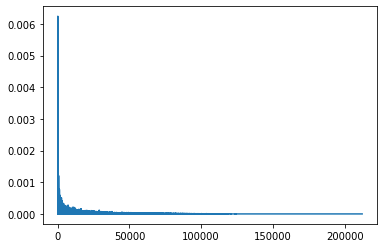

In [38]:
plt.plot(gap_vector)

In [39]:
marker = 0
for i in range(1,length-1):
    if cluster_dict_list[marker] == cluster_dict_list[i]:

        gap_vector[marker] += gap_vector[i]
        gap_vector[i] = 0
        #print(marker)


    else:
        marker = i

0.9999999999999996


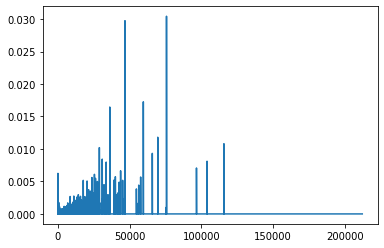

In [40]:
print(np.sum(gap_vector))
plt.plot(gap_vector)

In [41]:
candidates = np.flip(np.argsort(gap_vector))

In [42]:
gap_vector[candidates[0]]

0.03043064426104927

In [43]:
idx = candidates[0]
idx

75731

In [44]:
pred = np.array(list(cluster_dict_list[idx].values()))

In [45]:
print(gap_vector[idx])
print('percent confidence')
'{:.1%}'.format(gap_vector[idx])

0.03043064426104927
percent confidence


'3.0%'

In [46]:
np.array(list(cluster_dict_list[idx].values()))

array([1, 1, 1, ..., 1, 1, 1])

In [47]:
#cluster_idx_array = (np.unique(np.array(list(cluster_dict_list[idx].values()))))
#print(cluster_idx_array)
#print(np.count_nonzero(cluster_idx_array))

number_of_clusters = np.count_nonzero(np.unique(np.array(list(cluster_dict_list[idx].values()))))
print(number_of_clusters)
print('your dataset appears to have', number_of_clusters,'clusters, not including any outliers')
#return counts from np.unique? to filter out small clusters?

2
your dataset appears to have 2 clusters, not including any outliers


In [48]:
true = y

print(metrics.adjusted_rand_score(true, pred))
print(metrics.silhouette_score(X, pred, metric="sqeuclidean"))

0.004391886373652114
-0.024993648777086114


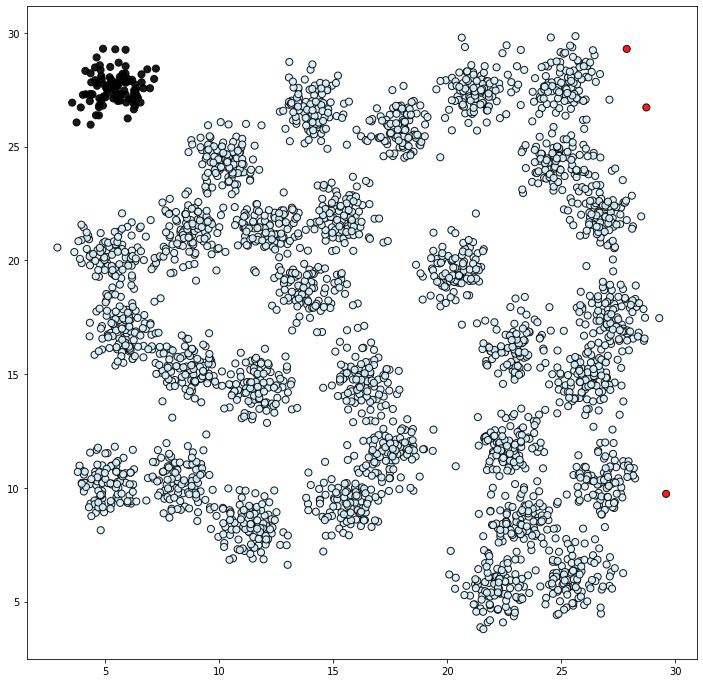

In [49]:
size=12
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=50, 
            c=np.array(list(cluster_dict_list[idx].values())),
            marker="o",
            cmap='flag',
            norm=None,
            alpha=.9,
            edgecolor="k")

In [50]:
idx_list = candidates[:100]
idx_list

array([ 75731,  46769,  59567,  36168,  69625, 115780,  28899,  65829,
        30916, 103999,  33661,  96637,  43716,      9,  25467,  40056,
        57702,  23697,  26203,  39089,  45146,  17677,  20330,  27529,
        42705,  28311,  32150,      7,  56355,  54724,      6,     25,
        21389,  22729,  20873,  21739,  27133,  42026,  24512,  24869,
        41231,  34907,  14232,  35706,  11073,  15717,   8534,  18771,
        22221,  13297,  13456,  15217,      4,  46264,  30578,     28,
        13894,  19774,  19523,  16281,     22,    104,  12414,  33083,
        26906,  15522,  17194,     86,  35385,  21224,  23422,  17530,
           48,  10495,  22552,  18577,    555,     27,  30312,      1,
        19369,   6838,  25236,  18429,  18109,  55861,   8788,  15033,
        12853,  16574,  16704,  10299,   7752,  33413,  10381,  11317,
           20,  14033,  16928,  10669])

In [51]:
idx_list.sort()

In [165]:
idx_list = [x for x in idx_list if x < idx]

In [166]:
idx_array = np.asarray(idx_list)
idx_array

array([    1,     4,     6,     7,     9,    20,    22,    25,    27,
          28,    48,    86,   104,   555,  6838,  7752,  8534,  8788,
       10299, 10381, 10495, 10669, 11073, 11317, 12414, 12853, 13297,
       13456])

In [167]:
silhouette_list = []
for i in idx_list:
    
    silhouette = metrics.silhouette_score(X, np.array(list(cluster_dict_list[i].values())), metric="euclidean")
    silhouette_list.append(silhouette)

In [168]:
silhouette_array = np.asarray(silhouette_list)

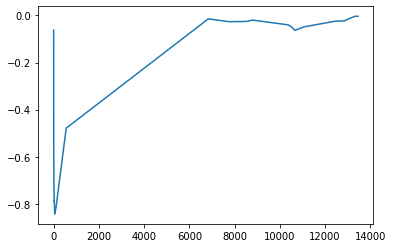

In [169]:
plt.plot(idx_array,silhouette_array)

In [207]:
new_scaler = np.arange(len(idx_array))

In [208]:
new_scaler

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [210]:
#find normalized distance
scaler = MinMaxScaler()
new_scaler = scaler.fit_transform(new_scaler.reshape(-1,1))

In [212]:
new_scaler

array([[0.        ],
       [0.03703704],
       [0.07407407],
       [0.11111111],
       [0.14814815],
       [0.18518519],
       [0.22222222],
       [0.25925926],
       [0.2962963 ],
       [0.33333333],
       [0.37037037],
       [0.40740741],
       [0.44444444],
       [0.48148148],
       [0.51851852],
       [0.55555556],
       [0.59259259],
       [0.62962963],
       [0.66666667],
       [0.7037037 ],
       [0.74074074],
       [0.77777778],
       [0.81481481],
       [0.85185185],
       [0.88888889],
       [0.92592593],
       [0.96296296],
       [1.        ]])

In [170]:
inverted_normed_distance[idx_array]

array([0.9986246 , 0.99668191, 0.99283574, 0.98927064, 0.98349204,
       0.97998255, 0.97756602, 0.97517165, 0.97227341, 0.97043351,
       0.96341837, 0.95069176, 0.94532956, 0.8782616 , 0.61138184,
       0.59086757, 0.57552992, 0.56962166, 0.54064442, 0.53919841,
       0.53729977, 0.53446772, 0.52731142, 0.52314435, 0.50572086,
       0.49905429, 0.49292474, 0.49038258])

In [171]:
inverted_normed_silhouette_array = np.multiply(silhouette_array,inverted_normed_distance[idx_array])

In [172]:
inverted_normed_silhouette_array

array([-0.0624542 , -0.46975403, -0.61191555, -0.62790958, -0.67641656,
       -0.75551578, -0.77171212, -0.76744346, -0.76426945, -0.76522403,
       -0.81200418, -0.78410369, -0.77143373, -0.42043284, -0.00869653,
       -0.01563062, -0.01461832, -0.01118966, -0.02106044, -0.0218022 ,
       -0.02531045, -0.03379728, -0.02546904, -0.02302026, -0.01259734,
       -0.01127362, -0.00190203, -0.00159646])

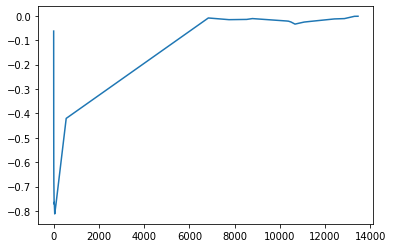

In [173]:
plt.plot(idx_array,inverted_normed_silhouette_array)

In [174]:
max_idx = inverted_normed_silhouette_array.argmax()

In [175]:
idx = idx_array[max_idx]
idx

13456

In [176]:
#idx = silhouette_scores.index(max(silhouette_scores[simplex_tree.num_vertices():idx]))
#print(idx)

In [177]:
rand_score_list = []
true = y
for i in idx_list:
    pred = np.array(list(cluster_dict_list[i].values()))
    rand_score = metrics.adjusted_rand_score( true, pred)
    rand_score_list.append(rand_score)

In [178]:
rand_score_array = np.asarray(rand_score_list)

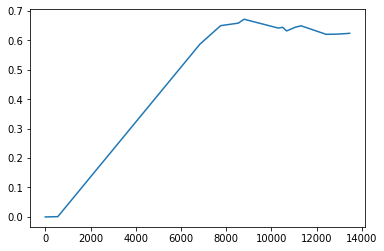

In [179]:
 plt.plot(idx_array,rand_score_array)

In [180]:
max(rand_score_array)

0.6710938953449004

In [181]:
best_idx = idx_array[rand_score_array.argmax()]
best_idx

8788

In [182]:
def get_first_max(array):
    for i in range(len(array)):
        if idx_array[i] > 2*simplex_tree.num_vertices():

            if array[i] > array[i+1]:
                return float(array[i])

In [183]:
first_max = get_first_max(silhouette_array)
idx_array[np.where(silhouette_array == first_max)]

array([6838])

In [193]:
idx = int(idx_array[np.where(silhouette_array == first_max)])
idx

6838

In [194]:
pred = np.array(list(cluster_dict_list[idx].values()))
pred

array([  5,   0,   5, ...,   3, 644, 909])

In [195]:
rand_score = metrics.adjusted_rand_score( true, pred)
rand_score

0.5865644131706756

In [196]:
masked = np.ma.masked_where(pred == 0,pred)
masked

masked_array(data=[5, --, 5, ..., 3, 644, 909],
             mask=[False,  True, False, ..., False, False, False],
       fill_value=999999)

In [197]:
#cluster_idx_array = (np.unique(np.array(list(cluster_dict_list[idx].values()))))
#print(cluster_idx_array)
#print(np.count_nonzero(cluster_idx_array))

number_of_clusters = np.count_nonzero(np.unique(np.array(list(cluster_dict_list[idx].values()))))
print(number_of_clusters)
print('your dataset appears to have', number_of_clusters,'clusters, not including any outliers')
#return counts from np.unique? to filter out small clusters?

184
your dataset appears to have 184 clusters, not including any outliers


In [198]:
cmap = plt.cm.get_cmap("flag").copy()
cmap.set_bad(cmap(0))
cmap.set_under(cmap(1))

In [199]:
cmap.get_bad()

array([1., 0., 0., 1.])

In [200]:
#cmap(number_of_clusters)

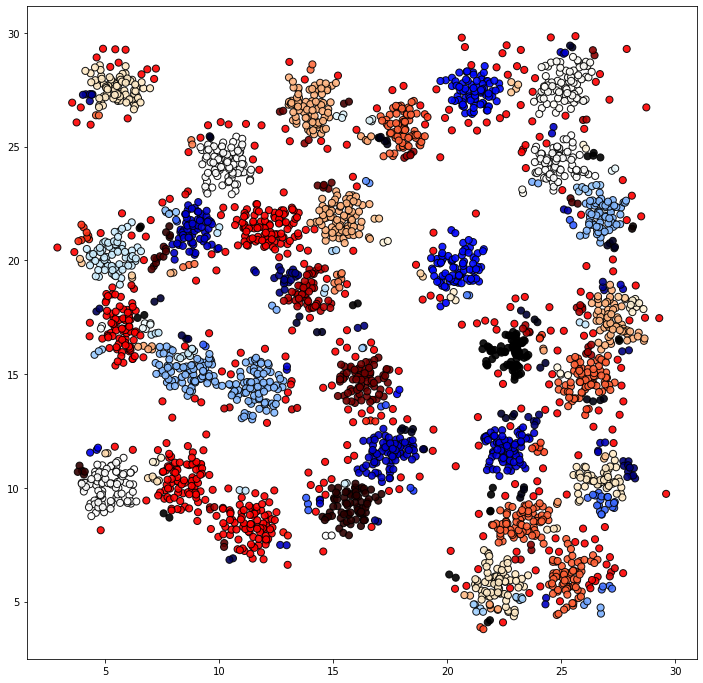

In [201]:
size=12
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=50, 
            c=pred,
            marker="o",
            cmap=cmap,
            norm=None,
            alpha=.9,
            edgecolor="k")

plt.show()

MovieWriter stderr:
Error writing trailer of D31.txt28frames.gif: Invalid argument



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '288x288', '-pix_fmt', 'rgba', '-r', '6.666666666666667', '-loglevel', 'error', '-i', 'pipe:', '-filter_complex', 'split [a][b];[a] palettegen [p];[b][p] paletteuse', '-y', 'D31.txt28frames.gif']' returned non-zero exit status 255.

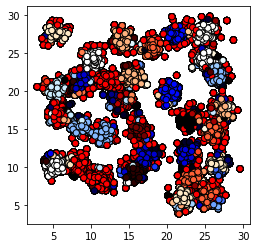

In [202]:
fig, ax = plt.subplots(figsize=(4,4))
frames = len(idx_array)


outfile = str(filename) + str(frames) + 'frames.gif'

if not os.path.isfile(outfile):
    def init():
        scatter = ax.scatter(X[:, 0], X[:, 1],
                        s=40, 
                        c=np.array(list(cluster_dict_list[0].values())),
                        marker="o",
                        cmap=cmap,
                        norm=None,
                        alpha=1,
                        edgecolor="k")
        #ax.set(xlim=(-1, 35), ylim=(-1, 35))

        return scatter,

    #collection = PatchCollection(X, animated=True)

    #ax.add_collection(collection)
    #ax.autoscale_view(True)

    def animate(i):

        scatter = ax.scatter(X[:, 0], X[:, 1],
                    s=40, 
                    c=np.array(list(cluster_dict_list[idx_array[i]].values())),
                    marker="o",
                    cmap=cmap,
                    norm=None,
                    alpha=1,
                    edgecolor="k")
        return scatter,



    ani = FuncAnimation(fig, animate,interval=150,init_func=init,frames=frames,repeat=False, blit=True)

    #ani.save('animation.gif')



    #writer=animation.PillowWriter()

    #writer = animation.FFMpegWriter(fps=2,bitrate=1000)

    ani.save(outfile)
    fig.show()


def pogo(dataset):
    rips_complex = gudhi.RipsComplex(points=dataset,max_edge_length=100)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
    df = pd.DataFrame(simplex_tree.get_filtration(), columns=['simplex','distance'])
    #move through list and assign clusters to conected components

    point_dict={i:0 for i in range(simplex_tree.num_vertices())}
    counter=0

    cluster_dict_list = []
    for i in range(simplex_tree.num_vertices(),len(df)):
        #if both points are still in cluster 0, assign both to a new cluster
        if point_dict[df.loc[i,'simplex'][0]] == 0 and point_dict[df.loc[i,'simplex'][1]] == 0:
            counter += 1
            point_dict[df.loc[i,'simplex'][0]] = counter
            point_dict[df.loc[i,'simplex'][1]] = counter
            #if one point is in cluster 0 and one is not, assign the one in cluster 0 to the existing cluster
        elif point_dict[df.loc[i,'simplex'][0]] == 0 and point_dict[df.loc[i,'simplex'][1]] != 0:
            point_dict[df.loc[i,'simplex'][0]] = point_dict[df.loc[i,'simplex'][1]]

            #and vice versa
        elif point_dict[df.loc[i,'simplex'][0]] != 0 and point_dict[df.loc[i,'simplex'][1]] == 0:
            point_dict[df.loc[i,'simplex'][1]] = point_dict[df.loc[i,'simplex'][0]]

            #if both points are not in cluster 0 and not in the same cluster, merge clusters to the lower number cluster
        elif point_dict[df.loc[i,'simplex'][0]] != 0 and point_dict[df.loc[i,'simplex'][1]] != 0 and point_dict[df.loc[i,'simplex'][0]] != point_dict[df.loc[i,'simplex'][1]]:
            larger_cluster_number = max(point_dict[df.loc[i,'simplex'][0]], point_dict[df.loc[i,'simplex'][1]])
            smaller_cluster_number = min(point_dict[df.loc[i,'simplex'][0]], point_dict[df.loc[i,'simplex'][1]])
            for key, value in point_dict.items():
                if value == larger_cluster_number:
                    point_dict[key] = smaller_cluster_number
        cluster_dict_list.append(point_dict.copy())
        #print(point_dict)
        #print('step',i)

    
    cutoff_value = 0
    for i in range(len(cluster_dict_list)):
        if cutoff_value == 0:
            if all(value != 0 for value in cluster_dict_list[i].values()):
                cutoff_value = i
                print('dataset becomes connected at simplex #',cutoff_value)
       
    df = df[:cutoff_value]
    #cluster_dict_list =
    
    #find the gaps between birth/death pairs

    df['gaps'] = df['distance'] - df['distance'].shift(1)
    
    #find normalized distance
    scaler = MinMaxScaler()
    df['normed_distance'] = scaler.fit_transform(df['distance'].values.reshape(-1, 1))

    #Mulitply the gaps by their normed location in the filtration, weighting features more heavily if they're later
    df['normed_gaps'] = df['gaps'] * df['normed_distance']

    norm_sum = df['normed_gaps'].sum()
    df['probability_vector_normed_gaps'] = df['normed_gaps'] / norm_sum
    
    gap_sum = df['gaps'].sum()
    df['probability_vector_gaps'] = df['normed_gaps'] / gap_sum

    partition = 10
    candidates = [i for i in df.nlargest(partition ,['gaps']).index if i in df.nlargest( partition,['normed_gaps']).index]
    #print('possible cuttoffs' , candidates)
    idx = cutoff_value - 1
    #idx = candidates[0]
    print('idx' ,idx)

    print('your dataset appears to have', len(np.unique(np.array(list(cluster_dict_list[idx].values())))),'clusters')

    #print( np.array(list(cluster_dict_list[idx].values())))

    print(simplex_tree.num_vertices() , 'vertices')  
    print(simplex_tree.num_simplices(), 'simplices')
    print('dimension:', simplex_tree.dimension())

    size=10
    plt.figure(figsize=(size,size))
    plt.scatter(dataset[:, 0], dataset[:, 1],
                s=30, 
                c=np.array(list(cluster_dict_list[idx].values())),
                marker="o",
                cmap='rainbow',
                norm=None,
                alpha=.9,
                edgecolor="k")
    
    return cluster_dict_list, candidates, idx


cluster_dict_list, candidates, idx = pogo(X)

true = y
pred = np.array(list(cluster_dict_list[idx].values()))

print('adjusted rand score =' , metrics.adjusted_rand_score(true, pred))
